<a href="https://colab.research.google.com/github/Kiruba-Sherlin/Deep-learning-project/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow numpy matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images / 127.5 - 1
test_images = test_images / 127.5 - 1

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
print('Number of images in the training dataset:', train_images.shape[0])
print('Number of images in the testing dataset:', test_images.shape[0])

Number of images in the training dataset: 50000
Number of images in the testing dataset: 10000


In [5]:
print(f"Shape of the images in the training dataset: {train_images[0].shape}")

Shape of the images in the training dataset: (32, 32, 3)


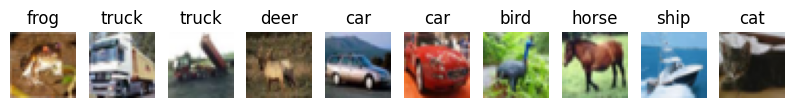

In [8]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  image = train_images[i]
  denoramalized_image = (image + 1) / 2
  axes[i].imshow(denoramalized_image)
  axes[i].set_title(classes[train_labels[i][0]])
  axes[i].axis('off')

In [10]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       553,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,742 (2.44 MB)

 Trainable params: 639,742 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 183s 116ms/step - accuracy: 0.4399 - loss: 1.5397 - val_accuracy: 0.6488 - val_loss: 1.0137
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 211s 122ms/step - accuracy: 0.6812 - loss: 0.9154 - val_accuracy: 0.6883 - val_loss: 0.8906
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.7416 - loss: 0.7382 - val_accuracy: 0.7295 - val_loss: 0.7933
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 108ms/step - accuracy: 0.7923 - loss: 0.5963 - val_accuracy: 0.7267 - val_loss: 0.8133
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 98ms/step - accuracy: 0.8290 - loss: 0.4881 - val_accuracy: 0.7289 - val_loss: 0.8320
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 99ms/step - accuracy: 0.8640 - loss: 0.3920 - val_accuracy: 0.7305 - val_loss: 0.8686
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 99ms/step - accuracy: 0.8930 - loss: 0.3111 - val_accuracy: 0.7228 - val_loss: 0.9847
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 99ms/step - accura

In [13]:
def view_classification(image, probabilities):
  fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
  denoramalized_image = (image + 1) / 2
  ax1.imshow(denoramalized_image)
  ax1.axis('off')
  ax2.barh(np.arange(10), probabilities)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(classes)
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)
  plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


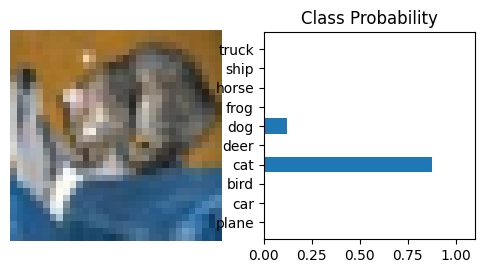

In [14]:
index = 0
image, label = test_images[index], test_labels[index]
probabilities = model.predict(image.reshape(1, 32, 32, 3))
view_classification(image, probabilities[0])

In [15]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7312 - loss: 1.2214
Accuracy of the neural network on the 10000 test images: 72.85%
